개발자는 파이참을 주로 쓰고, 데이터 시각화 및 분석에 이용하는 것은 쥬피터.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('FIFA_train.csv') # 판다스를 이용해 csv 파일을 읽어와 train 변수에 저장

In [33]:
train.head(15) # 데이터프레임.head(): 5개의 row만 보기

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
5,12,D. Godín,32,south america,2019,DF,right,3.0,90,90,2.0,44000000.0
6,13,David Silva,32,europe,2020,MF,left,4.0,90,90,4.0,60000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
8,18,M. ter Stegen,26,europe,2022,GK,right,3.0,89,92,1.0,58000000.0
9,19,T. Courtois,26,europe,2024,GK,left,4.0,89,90,1.0,53500000.0


In [4]:
import matplotlib.pyplot as plt
# 시각화하기 위해서 패키지를 불러와야 한다.

# contract: 계약 만료 연도
# reputaion: 명성도
# stat_overall: 전체 스탯
# skill_moves: 개인 기량

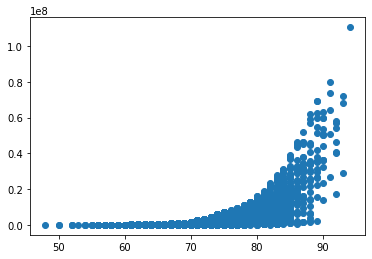

In [5]:
plt.scatter(train['stat_potential'], train['value'])    #stat_potential, value을 지수함수로 표현

In [6]:
import seaborn as sns

In [14]:
# seaborn 역시 시각화에 자주 사용되는 패키지

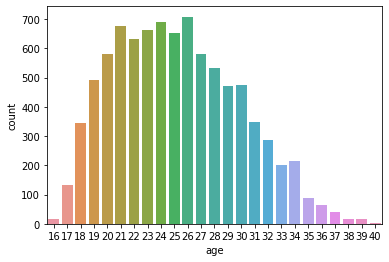

In [7]:
sns.countplot(train['age'])    #나이별 분포

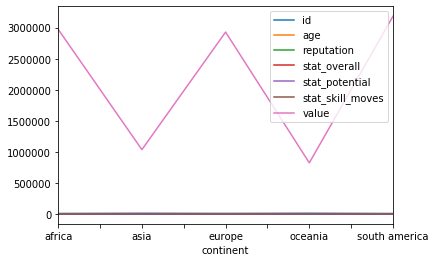

In [8]:
# 출신 지역을 groupby 라는 함수로 묶어야 하는데 바로 들어가면 어려울 수 있어서 barplot을 사용?
# barplot이 없어서 사용 못함...
train.groupby('continent').mean().plot() #대륙별 평균 값

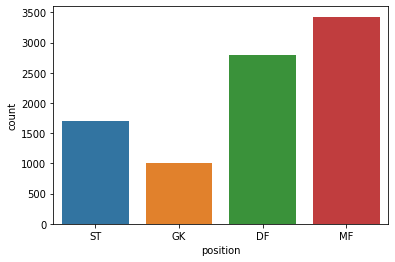

In [9]:
sns.countplot(train['position'])

# 각 포지션의 수 비율이 다르다는 것을 도메인 지식으로 활용할 수 있다.
# 도메인 지식은 가격에 영향을 미친다.


# 수요 공급의 측면에서 포지션을 보는 것이 어떨까?

In [21]:
# 랜덤 포레스트는 클래시피케이션, 분류화에 
# 연속형 변수를 예측하는 분석 작업에 유용한
# 랜덤 포레스트는 classification, 연속형 변수 예측에 동시에 사용 가능

In [10]:
# 랜덤 포레스트를 사용하려면 패키지를 불러와야 함

from sklearn.ensemble import RandomForestClassifier

# sklearn.ensemble 안에 있는 RamdomForestClassifier 이라는 것을 가져옴

In [11]:
rf = RandomForestClassifier(n_estimators = 100)

# 랜덤 포레스트는 의사결정 나무. 다수의 나무가 결정을 하는 것.
# 가장 다수의 나무가 선택하는 것이 이론적인 가격.

In [12]:
rf.fit(train)

# fit: 학습을 시킨다.
# 특정 컬럼만을 가져와서 학습을 시켜야 하는데

TypeError: fit() missing 1 required positional argument: 'y'

In [14]:
x = train[['age', 'continent', 'position', 'stat_overall', 'stat_potential']]

In [15]:
x.head() # x에는 해당 컬럼들만 남는다.
# 하지만 랜덤 포레스트는 숫자를 인식하지 못하므로 숫자로 바꿔줘야 함 -> 대륙을 숫자코드로 바꿔줘야 함.

,age,continent,position,stat_overall,stat_potential
0,31,south america,ST,94,94
1,27,europe,GK,91,93
2,31,south america,ST,91,91
3,32,europe,DF,91,91
4,25,europe,GK,90,93


In [16]:
x['continent'].unique() # 해당 컬럼 안에 어떤 인덱스가 있는지 알 수 있다.

array(['south america', 'europe', 'africa', 'asia', 'oceania'],
      dtype=object)

In [17]:
x['continent'] = x['continent'].map({'south america':0, 'europe':1, 'africa':2, 'asia':3, 'oceania':4})

#'south america':0, 'europe':1, 'africa':2, 'asia':3, 'oceania':4

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
x.head()
# 이러한 작업을 포지션에 적용

,age,continent,position,stat_overall,stat_potential
0,31,0,ST,94,94
1,27,1,GK,91,93
2,31,0,ST,91,91
3,32,1,DF,91,91
4,25,1,GK,90,93


In [19]:
x['position'].unique()    #포지션도 숫자코드를 부여함

array(['ST', 'GK', 'DF', 'MF'], dtype=object)

In [20]:
x['position'] = x['position'].map({'ST':0, 'GK':1, 'DF':2, 'MF':3})

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
x.head()
#'ST':0, 'GK':1, 'DF':2, 'MF':3

,age,continent,position,stat_overall,stat_potential
0,31,0,0,94,94
1,27,1,1,91,93
2,31,0,0,91,91
3,32,1,2,91,91
4,25,1,1,90,93


In [22]:
# 무엇을 예측할 것인지 입력
y = train['value']

In [23]:
rf.fit(x, y)   #x를 통해 y를 알아내겠다

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
test = pd.read_csv('FIFA_test.csv')

In [25]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [26]:
x2 = test[['age', 'continent', 'position', 'stat_overall', 'stat_potential']]
# x2에는 아까와 같은 작업을 해야 함

In [27]:
x2.head()

,age,continent,position,stat_overall,stat_potential
0,33,europe,ST,94,94
1,26,south america,ST,92,93
2,27,europe,MF,91,92
3,27,europe,ST,91,91
4,32,europe,MF,91,91


In [28]:
x2['continent'] = x2['continent'].map({'south america':0, 'europe':1, 'africa':2, 'asia':3, 'oceania':4})
x2['position'] = x2['position'].map({'ST':0, 'GK':1, 'DF':2, 'MF':3})
x2.head()

/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/noblyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,continent,position,stat_overall,stat_potential
0,33,1,0,94,94
1,26,0,0,92,93
2,27,1,3,91,92
3,27,1,0,91,91
4,32,1,3,91,91


In [29]:
answer = test['id']   #동명이인 경우 고려하여 id값을 넣음
answer = pd.DataFrame(answer)
answer
# test의 id column만 변수에 저장하면 이 형태를 시리즈라고 한다.
# 키값을 이름으로 해버리면 동명이인 존재 가능, 따라서 id 값으로 해야 한다.

,id
0,1
1,2
2,4
3,5
4,6
5,10
6,11
7,15
8,17
9,23


In [30]:
answer['value'] = rf.predict(x2)
# 컴퓨터가 학습한 것을 토대로 예측을 완료

In [31]:
answer.head()

,id,value
0,1,51000000.0
1,2,69500000.0
2,4,63000000.0
3,5,73500000.0
4,6,60000000.0


In [34]:
answer.to_csv('answer.csv', index = False)

# index까지 포함시킬 것인지 선택, 굳이 포함x -> index = False를 통하여 인덱스 값을 빼줌.
# csv파일로 변환 후 제출해야 결과를 확인할 수 있다.

## Feature Engineering

In [35]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


### 나이가 높은데 현재 오버롤이 높다?? 별로 안 좋으므로 컴퓨터에게 알려줘야 한다.
### stat_overall이 높아도 나이가 많으면 그렇게 좋은게 아니다.

In [36]:
train['age_stat_overall'] = train['stat_overall']/train['age']

In [37]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,age_stat_overall
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,3.032258
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,3.370370
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,2.935484
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,2.843750
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,3.600000


나이가 어리고 오버롤이 높을수록 상위에 랭크